In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [42]:
len(xtrain)

60000

In [43]:
len(xtest)

10000

In [44]:
xtrain[0].shape

(28, 28)

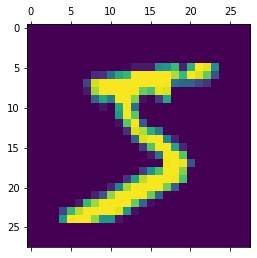

In [45]:
plt.matshow(xtrain[0])

In [46]:
xtrain_flat.shape

(60000, 784)

In [47]:
xtrain=xtrain/255
xtest=xtest/255

In [48]:
 xtrain_flat=xtrain.reshape(60000,784)

In [49]:
xtest_flat=xtest.reshape(len(xtest),28*28)

In [50]:
xtest_flat.shape

(10000, 784)

In [51]:
  xtrain_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [52]:
 model=keras.Sequential([
                   keras.layers.Dense(10, input_shape=(784,),activation="sigmoid")
 ])
 model.compile(
     optimizer='adam',
     loss="sparse_categorical_crossentropy",
     metrics=["accuracy"]
 )
 model.fit(xtrain_flat,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4699 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9256


In [53]:
model.evaluate(xtest_flat,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.9224


[0.27557286620140076, 0.9223999977111816]

In [55]:
ypredict = model.predict(xtest_flat)
ypredict[0]


array([2.3811370e-02, 5.2468175e-07, 6.0494393e-02, 9.6423995e-01,
       2.7454197e-03, 1.1097658e-01, 2.1054366e-06, 9.9979830e-01,
       1.8459672e-01, 6.5246910e-01], dtype=float32)

In [56]:
np.argmax(ypredict[0])

7

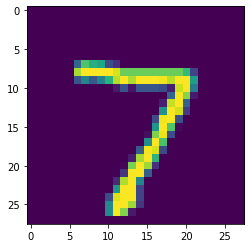

In [58]:
plt.imshow(xtest[0])

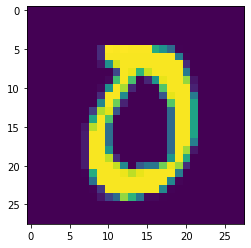

In [60]:
plt.imshow(xtest[28])

In [61]:
np.argmax(ypredict[28])

0

In [62]:
len(ypredict)

10000

In [63]:
#ynew=[]
#for i in range(len(ypredict)):

 # ynew  = ynew.append(ypredict[i])

AttributeError: ignored

In [69]:
y_predicted_labels= [np.argmax(i) for i in ypredict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [71]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    3,    7,    2,    6,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,   10,  910,   12,    8,    5,   13,   10,   54,    3],
       [   4,    0,   16,  904,    0,   28,    2,   14,   39,    3],
       [   1,    1,    2,    1,  926,    0,   12,    4,   12,   23],
       [  10,    3,    1,   31,   10,  764,   14,    6,   48,    5],
       [  10,    3,    5,    0,    7,   11,  915,    2,    5,    0],
       [   1,    5,   22,    3,    8,    0,    0,  959,    9,   21],
       [   4,    8,    6,   13,    9,   15,    8,   11,  897,    3],
       [   9,    7,    1,   11,   43,    8,    0,   31,   19,  880]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

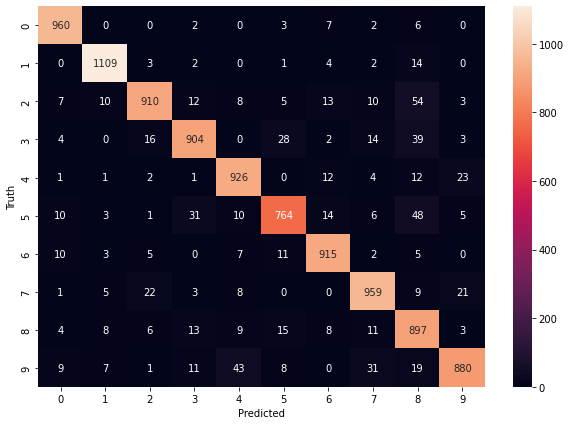

In [72]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [77]:
 model=keras.Sequential([
                   keras.layers.Dense(100, input_shape=(784,),activation="relu"),
                   keras.layers.Dense(10,activation="sigmoid")
 ])
 model.compile(
     optimizer='adam',
     loss="sparse_categorical_crossentropy",
     metrics=["accuracy"]
 )
 model.fit(xtrain_flat,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1243 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0662 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9840


In [75]:
model.evaluate(xtest_flat,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9766


[0.0807495042681694, 0.9765999913215637]

Text(69.0, 0.5, 'Truth')

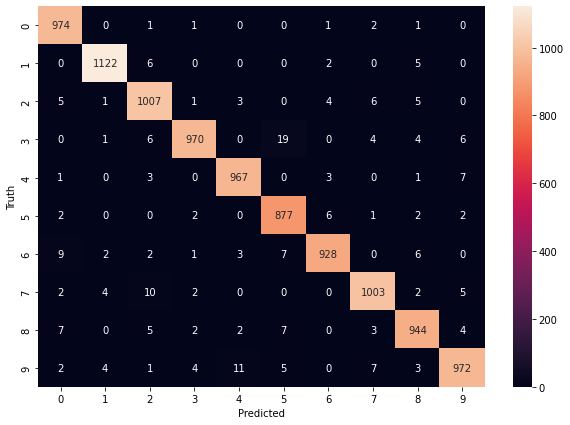

In [78]:
ypredict = model.predict(xtest_flat)
y_predicted_labels= [np.argmax(i) for i in ypredict]
y_predicted_labels[:5]
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel("Truth")

**If you dont want a flatten array**

In [87]:
model=keras.Sequential([
                   keras.layers.Flatten(input_shape=(28,28)),
                   keras.layers.Dense(400,activation="relu"),
                   keras.layers.Dense(100,activation="relu"),
                   
                   keras.layers.Dense(10,activation="sigmoid")
 ])
model.compile(
     optimizer='adam',
     loss="sparse_categorical_crossentropy",
     metrics=["accuracy"]
 )
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1996 - accuracy: 0.9401
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0835 - accuracy: 0.9739
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0569 - accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9867
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9885
